## Visualizzazione dati Covid-19 per singola regione

I dati si trovano al link: https://github.com/pcm-dpc/COVID-19
I dati specifici ai report regionali: https://github.com/pcm-dpc/COVID-19/blob/master/dati-regioni/dpc-covid19-ita-regioni.csv

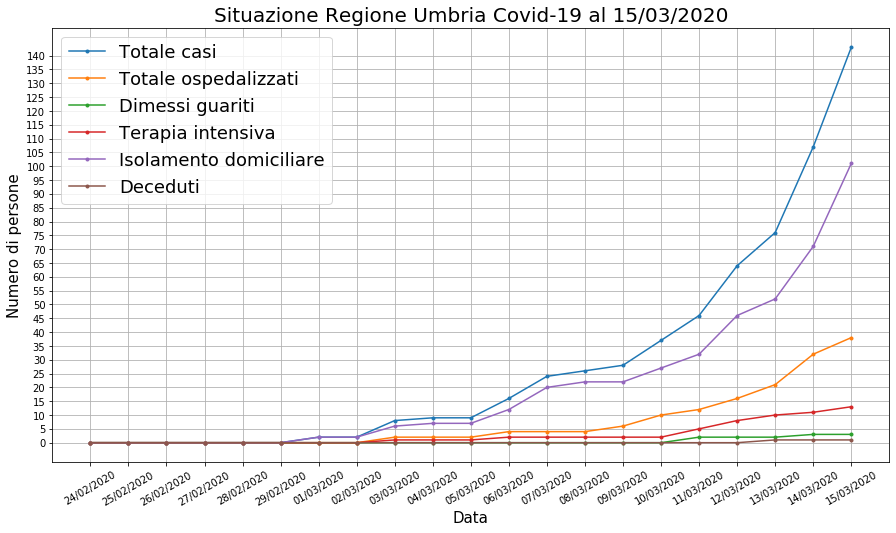

In [2]:
%matplotlib inline

import urllib
import urllib.request
import urllib.error
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np

regione = "Umbria"

url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'

# Acquisisco i dati dal sito

try:
    urllib.request.urlretrieve(url, 'datiregioni.csv')
except urllib.error.HTTPError as ex:
    print('Problem:', ex)

df_all = pd.read_csv("datiregioni.csv")
df_all["data"] = pd.to_datetime(df_all["data"]).dt.strftime("%d/%m/%Y")

df_regione = df_all[(df_all['denominazione_regione'] == regione)]
df_regione = df_regione.reset_index()

# Grafico i dati raccolti

register_matplotlib_converters()

last_day = df_regione.loc[len(df_regione)-1].at["data"]

plt.figure(figsize=(15,8))

# Per visualizzare i vari report, scommentare le righe di interesse

plt.plot(df_regione["data"], df_regione["totale_casi"], label="Totale casi", marker = ".")
#plt.plot(df_regione["data"], df_regione["nuovi_attualmente_positivi"], label="Nuovi attualmente positivi", marker = ".")
#plt.plot(df_regione["data"], df_regione["tamponi"], label="Tamponi", marker = ".")
#plt.plot(df_regione["data"], df_regione["ricoverati_con_sintomi"], label="Ricoverati con sintomi", marker = ".")
plt.plot(df_regione["data"], df_regione["totale_ospedalizzati"], label="Totale ospedalizzati", marker = ".")
plt.plot(df_regione["data"], df_regione["dimessi_guariti"], label="Dimessi guariti", marker = ".")
plt.plot(df_regione["data"], df_regione["terapia_intensiva"], label="Terapia intensiva", marker = ".")
plt.plot(df_regione["data"], df_regione["isolamento_domiciliare"], label="Isolamento domiciliare", marker = ".")
plt.plot(df_regione["data"], df_regione["deceduti"], label="Deceduti", marker = ".")

plt.yticks(np.arange(df_regione["totale_casi"].min(), df_regione["totale_casi"].max(), 5))

plt.title("Situazione Regione " + regione + " Covid-19 al " + last_day, fontsize=20)
plt.xlabel("Data", fontsize=15)
plt.ylabel("Numero di persone", fontsize=15)
plt.legend(loc="best", prop={'size': 18})
plt.xticks(rotation=30)
plt.grid()
nomefile = regione + "_dettaglio_" + last_day + ".png"
nomefile = nomefile.replace("/", "-")
plt.savefig(nomefile)
plt.show()